In [4]:
pip install PyPDF2

In [6]:
pip install docx2txt

  Created wheel for docx2txt: filename=docx2txt-0.8-py3-none-any.whl size=3969 sha256=9ec5dddac0b367b9f8a72c36e6bd1d55766515b70ad41e2f62a15004343b4ea0
  Stored in directory: c:\users\shekh\appdata\local\pip\cache\wheels\b7\20\b2\473e3aea9a0c0d3e7b2f7bd81d06d0794fec12752733d1f3a8
Successfully built docx2txt
Note: you may need to restart the kernel to use updated packages.


In [8]:
import numpy as np
import PyPDF2
import docx2txt
import sys
import matplotlib.pyplot as plt
%matplotlib inline 
import networkx as nx
from nltk.tokenize.punkt import PunktSentenceTokenizer
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [11]:
def readDoc():
    name = input('Please input a file name: ') 
    print('You have asked for the document {}'.format(name))

    # now read the type of document
    if name.lower().endswith('.txt'):
        choice = 1
    elif name.lower().endswith('.pdf'):
        choice = 2
    else:
        choice = 3
        # print(name)
    print(choice)
    # Case 1: if it is a .txt file
        
    if choice == 1:
        f = open(name, 'r')
        document = f.read()
        f.close()
            
    # Case 2: if it is a .pdf file
    elif choice == 2:
        pdfFileObj = open(name, 'rb')
        pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
        pageObj = pdfReader.getPage(0)
        document = pageObj.extractText()
        pdfFileObj.close()
    
    # Case 3: none of the format
    else:
        print('Failed to load a valid file')
        print('Returning an empty string')
        document = ''
    
    print(type(document))
    return document

In [12]:
def tokenize(document):
    # We are tokenizing using the PunktSentenceTokenizer
    # we call an instance of this class as sentence_tokenizer
    doc_tokenizer = PunktSentenceTokenizer()
    
    # tokenize() method: takes our document as input and returns a list of all the sentences in the document
    
    # sentences is a list containing each sentence of the document as an element
    sentences_list = doc_tokenizer.tokenize(document)
    return sentences_list

In [14]:
document = readDoc()
print('The length of the file is:', end=' ')
print(len(document))

Please input a file name: story.txt
You have asked for the document story.txt
1
<class 'str'>
The length of the file is: 1962


In [15]:
sentences_list = tokenize(document)

# let us print the size of memory used by the list sentences
print('The size of the list in Bytes is: {}'.format(sys.getsizeof(sentences_list)))

# the size of one of the element of the list
print('The size of the item 0 in Bytes is: {}'.format(sys.getsizeof(sentences_list[0])))

The size of the list in Bytes is: 352
The size of the item 0 in Bytes is: 90


In [17]:
print('The size of the list "sentences" is: {}'.format(len(sentences_list)))

The size of the list "sentences" is: 27


In [18]:
# If the input document is long, which on realistically will be wrong, we would not like to print the entire document
for i in sentences_list:
    print(i)

 AMIN AND THE EGCS

   Once upon a time .
.
.
a peasant called Amin lost all his crops from his 
miserable little plot in a drought.
He decided to seek his fortune in another 
village, and off he went on his donkey.
On credit, he obtained a dozen 
hard-boiled eggs from a merchant for his journey.
Seven years later, Amin returned to his village.
This time he was riding a 
fine black horse, followed by a servant on a camel laden with gold and silver 
coins.
Amin had become a rich man and the news of this soon spread through the
village.
Straight away, the merchant who had given him the dozen eggs on 
credit knocked at Amin's door, asking for five hundred silver pieces in 
payment of the old debt.
Amin of course refused to pay such a large sum and 
the matter was taken before the judge.
On the day of the hearing, the merchant appeared in court at the appointed 
time, but of Amin there was no sign.
The judge waited impatiently for a 
quarter of an hour, and was on the point of adjourning t

In [19]:
cv = CountVectorizer()
cv_matrix = cv.fit_transform(sentences_list)

In [21]:
print('The data type of bow matrix {}'.format(type(cv_matrix)))
print('Shape of the matrix {}'.format(cv_matrix.get_shape))
print('Size of the matrix is: {}'.format(sys.getsizeof(cv_matrix)))
print(cv.get_feature_names())
print(cv_matrix.toarray())

The data type of bow matrix <class 'scipy.sparse.csr.csr_matrix'>
Shape of the matrix <bound method spmatrix.get_shape of <27x179 sparse matrix of type '<class 'numpy.int64'>'
	with 312 stored elements in Compressed Sparse Row format>>
Size of the matrix is: 56
['adjourning', 'after', 'ago', 'agreed', 'air', 'all', 'amin', 'an', 'and', 'another', 'appeared', 'appointed', 'are', 'asked', 'asking', 'at', 'away', 'beans', 'because', 'become', 'been', 'before', 'black', 'boiled', 'bought', 'breath', 'but', 'by', 'called', 'camel', 'case', 'chickens', 'cockerels', 'coins', 'course', 'court', 'credit', 'crop', 'crops', 'dashed', 'day', 'debt', 'decided', 'defence', 'demands', 'did', 'do', 'donkey', 'door', 'dozen', 'drought', 'egcs', 'eggs', 'exclaimed', 'fine', 'five', 'flock', 'followed', 'fool', 'for', 'fortune', 'fowls', 'from', 'garden', 'given', 'gold', 'good', 'great', 'grow', 'had', 'halr', 'hard', 'hatch', 'hatched', 'have', 'he', 'hearing', 'hens', 'him', 'his', 'horse', 'hostile',

In [22]:
normal_matrix = TfidfTransformer().fit_transform(cv_matrix)
print(normal_matrix.toarray())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [23]:
print(normal_matrix.T.toarray)
res_graph = normal_matrix * normal_matrix.T

<bound method _cs_matrix.toarray of <179x27 sparse matrix of type '<class 'numpy.float64'>'
	with 312 stored elements in Compressed Sparse Column format>>


Number of edges 207
Number of vertices 27


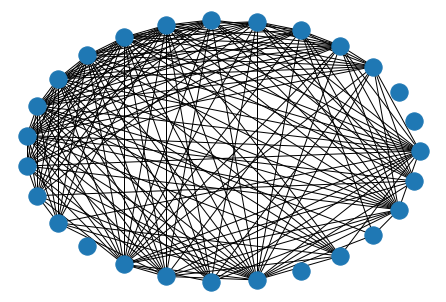

The memory used by the graph in Bytes is: 56


In [24]:
nx_graph = nx.from_scipy_sparse_matrix(res_graph)
nx.draw_circular(nx_graph)
print('Number of edges {}'.format(nx_graph.number_of_edges()))
print('Number of vertices {}'.format(nx_graph.number_of_nodes()))
plt.show()
print('The memory used by the graph in Bytes is: {}'.format(sys.getsizeof(nx_graph)))

In [25]:
ranks = nx.pagerank(nx_graph)

# analyse the data type of ranks
print(type(ranks))
print('The size used by the dictionary in Bytes is: {}'.format(sys.getsizeof(ranks)))

# print the dictionary
for i in ranks:
    print(i, ranks[i])


<class 'dict'>
The size used by the dictionary in Bytes is: 1184
0 0.039402758716484444
1 0.005928853754940712
2 0.005928853754940712
3 0.032549015035936754
4 0.04135417056269807
5 0.039843652516430364
6 0.03855143208930154
7 0.032589859553283376
8 0.04467699858829411
9 0.047137825315973464
10 0.04605470967558667
11 0.05019836780358621
12 0.0520008483711899
13 0.05532550603255787
14 0.03107076419960754
15 0.03326978378768377
16 0.04083000806643212
17 0.03952569169960474
18 0.038260874832895475
19 0.0325719801859165
20 0.027463784694943556
21 0.04719236513420329
22 0.03952569169960474
23 0.03619511570366952
24 0.029612781365775893
25 0.039143911825457754
26 0.033794395033000774


In [26]:
sentence_array = sorted(((ranks[i], s) for i, s in enumerate(sentences_list)), reverse=True)
sentence_array = np.asarray(sentence_array)

In [28]:
rank_max = float(sentence_array[0][0])
rank_min = float(sentence_array[len(sentence_array) - 1][0])
print(rank_max)
print(rank_min)

0.05532550603255787
0.005928853754940712


In [29]:
temp_array = []

# if all sentences have equal ranks, means they are all the same
# taking any sentence will give the summary, say the first sentence
flag = 0
if rank_max - rank_min == 0:
    temp_array.append(0)
    flag = 1

# If the sentence has different ranks
if flag != 1:
    for i in range(0, len(sentence_array)):
        temp_array.append((float(sentence_array[i][0]) - rank_min) / (rank_max - rank_min))

print(len(temp_array))


27


In [30]:
threshold = (sum(temp_array) / len(temp_array)) + 0.2

In [31]:
sentence_list = []
if len(temp_array) > 1:
    for i in range(0, len(temp_array)):
        if temp_array[i] > threshold:
                sentence_list.append(sentence_array[i][1])
else:
    sentence_list.append(sentence_array[0][1])

In [32]:
model = sentence_list

In [33]:
summary = " ".join(str(x) for x in sentence_list)
print(summary)
# save the data in another file, names sum.txt
f = open('final3.txt', 'a+')
#print(type(f))
f.write('\n')
f.write(summary)
f.close


At once, the merchant said, in defence of his 
demands:
   "I asked Amin for payment of five hundred silver coins, because twelve 
chickens might have hatched from the eggs he bought from me on credit, 
seven years ago. The judge waited impatiently for a 
quarter of an hour, and was on the point of adjourning the hearing, when Amin 
dashed in, out of breath. On the day of the hearing, the merchant appeared in court at the appointed 
time, but of Amin there was no sign. "I had a plate of boiled beans in the house and I planted them in the 
garden to have a good crop next year!" Straight away, the merchant who had given him the dozen eggs on 
credit knocked at Amin's door, asking for five hundred silver pieces in 
payment of the old debt.


<function TextIOWrapper.close()>

In [34]:
for lines in sentence_list:
    print(lines)

At once, the merchant said, in defence of his 
demands:
   "I asked Amin for payment of five hundred silver coins, because twelve 
chickens might have hatched from the eggs he bought from me on credit, 
seven years ago.
The judge waited impatiently for a 
quarter of an hour, and was on the point of adjourning the hearing, when Amin 
dashed in, out of breath.
On the day of the hearing, the merchant appeared in court at the appointed 
time, but of Amin there was no sign.
"I had a plate of boiled beans in the house and I planted them in the 
garden to have a good crop next year!"
Straight away, the merchant who had given him the dozen eggs on 
credit knocked at Amin's door, asking for five hundred silver pieces in 
payment of the old debt.
